In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv


**Dataset on Salary and years of Experience**

In [2]:
df=pd.read_csv("../input/salary-data-simple-linear-regression/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Scatterplot- Years of Experience vs Salary**

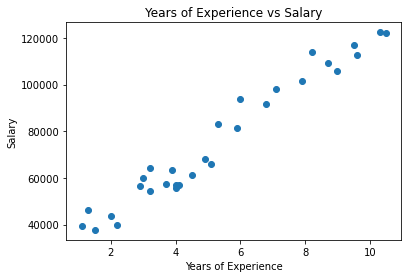

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df.YearsExperience, df.Salary)
plt.title('Years of Experience vs Salary')  
plt.xlabel('Years of Experience')  
plt.ylabel('Salary') 
plt.show()

In [4]:
df.info() #no null values found, so no data preparation required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe() #statistical result on the given data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Splitting of data into training and testing sets**

In [6]:
X = df.loc[:,["YearsExperience"]].values
y = df.loc[:, ["Salary"]].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

**Linear Regression from Scratch**

In [7]:
def prediction(x,w,b):
    y=w*x+b
    return y

In [8]:
w=13000 # w,b chosen by refering the statistical data
b=5000
y_pred=prediction(x_train,w,b)

**Plot with the intial parameters**

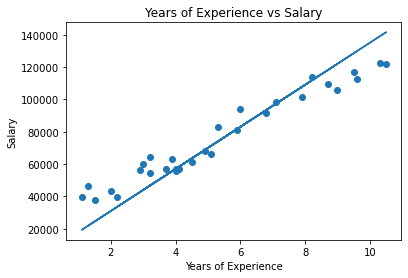

In [9]:
plt.scatter(X, y)
plt.plot(x_train, y_pred)
plt.title('Years of Experience vs Salary')  
plt.xlabel('Years of Experience')  
plt.ylabel('Salary') 
plt.show()

In [10]:
from sklearn import metrics
metrics.r2_score(y_train,y_pred)

0.7777138522752471

**Loss Function- Mean squared error**

In [11]:
def loss(y_pred,y):
    error=np.mean(np.square((y_pred-y)))
    return error

In [12]:
e=loss(y_pred,y_train)
e

136647661.375

**Model to reduce error by iterating and updating w and b**

In [13]:
def f(x,y,w,b,e):
    learning_rate=0.01
    err=[]
    for _ in range(1,1500):
        d_w=0
        d_b=0

        d_w=np.mean(2*x*(b + w*x - y))
        d_b=np.mean(2*(b + w*x - y))

        w=w-d_w*learning_rate
        b=b-d_b*learning_rate
        
        y_pred=prediction(x,w,b)
        e=loss(y_pred,y)
        err.append(e)
        
    return w,b,err
        


In [14]:
w,b,err=f(x_train,y_train,w,b,e)

**Final Linear Relation**

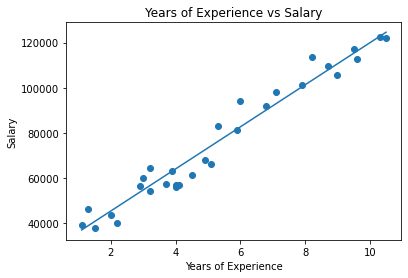

In [15]:
plt.scatter(df.YearsExperience, df.Salary)
plt.plot(df.YearsExperience, df.YearsExperience*w+b)
plt.title('Years of Experience vs Salary')  
plt.xlabel('Years of Experience')  
plt.ylabel('Salary') 
plt.show()

**Accuracy of the model**

In [16]:
y_pred=prediction(x_test,w,b)
e=loss(y_pred,y_test)
e**0.5

3566.123788668447

In [17]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9882674680502388

In [18]:
df1 = pd.DataFrame({'Actual': list(y_test), 'Predicted': list(y_pred)})  
df1

,Actual,Predicted
0,[37731.0],[40710.19749679504]
1,[122391.0],[122731.37761585745]
2,[57081.0],[64943.72798651802]
3,[63218.0],[63079.61025653932]
4,[116969.0],[115274.90669594267]
5,[109431.0],[107818.43577602791]


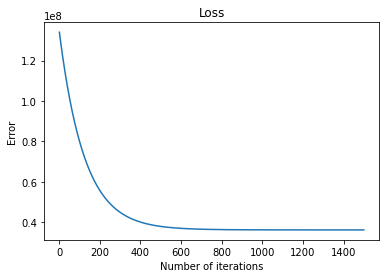

In [19]:
plt.plot([i for i in range(1,1500)],err)
plt.title('Loss')  
plt.xlabel('Number of iterations')  
plt.ylabel('Error') 
plt.show()

**Applying Linear Regression using sklearn library**

In [20]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(x_train, y_train) 

LinearRegression()

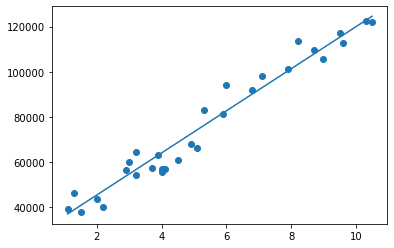

In [21]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [22]:
y_pred = regression.predict(x_test)

In [23]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.988169515729126

**Accuracy from both the methods is similar**